In [1]:
import pandas as pd
import numpy as np
import glob
import importlib
import pickle
import shap

In [2]:
features = ['ht', 'aplanarity', 'sphericity', 'chargeEta', 'met', 'deltaPhiTauMet', 'mt', 'mTauJet']

In [6]:
bdt = pickle.load(open("syst_variation/bdt_rs5/bdt.pkl", "rb"))

In [8]:
bkg = pd.read_hdf("syst_variation/bdt_rs5/QCD.h5")

In [11]:
signal = pd.read_hdf("syst_variation/bdt_rs5/TTJets_centJER_signal.h5")

In [14]:
signal = signal[signal["train_flag"] == "test"][features]

In [15]:
bkg = bkg[bkg["train_flag"] == "test"][features]

In [29]:
X = pd.concat([signal[0:5000], bkg[0:5000]], axis=0)

In [30]:
explainer = shap.TreeExplainer(bdt)

In [31]:
shap_values = explainer.shap_values(X)

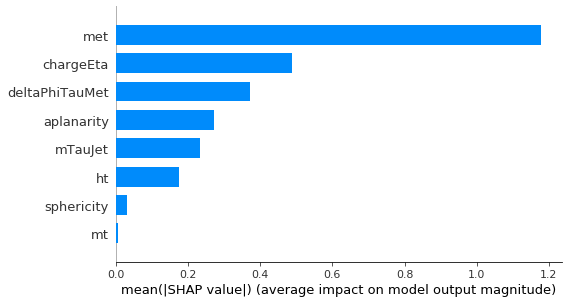

In [33]:
shap.summary_plot(shap_values, X,  plot_type="bar")

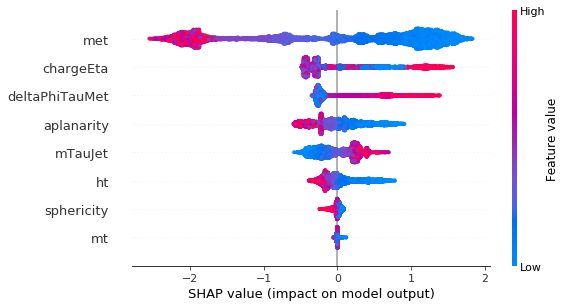

In [34]:
shap.summary_plot(shap_values, X)